# Introduction

* A **Circular Singly Linked list** is same as **singly-linked list**, with just one difference.
* It is that the last node of the linked list (**TAIL**) points towards the first node, forming a circular cycle.
* No node in the circular linked list points towards `NULL`.
* If we start from any node, then after traversal, we will again come back to the same node.
* Both the last node (**TAIL**) of the linked list and the **HEAD** pointer point towards the start node of the linked list.  
* Since the last node (**TAIL**) and the first node of the circular linked list are connected, the traversal in this linked list will go on forever until it is broken.

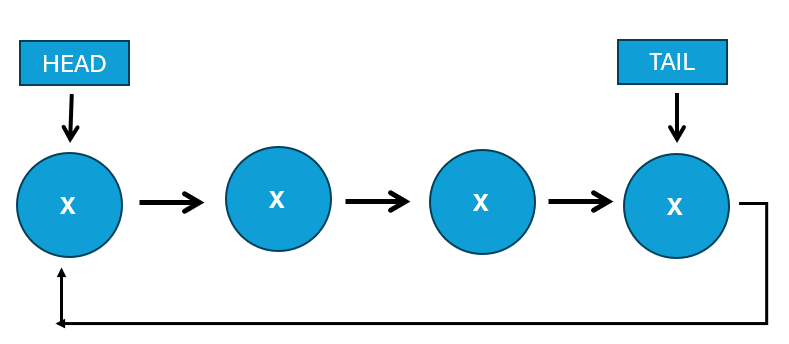

# Singly Linked List implementation

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
    
    def __str__(self):
        return str(self.value)

class CSLinkedList:
    # def __init__(self, value):
    #     new_node = Node(value)
    #     new_node.next = new_node
    #     self.head = new_node
    #     self.tail = new_node
    #     self.length = 1

    # Creation of a Singly Linked List
    def __init__(self):
        # Empty Circular Singly Linked List
        self.head = None
        self.tail = None
        self.length = 0

    # Print string representation of a Circular Singly Linked List
    def __str__(self):
        temp_node = self.head
        result = ''
        # Circular Singly Linked List traversal
        while temp_node is not None:
            result += str(temp_node.value)
            temp_node = temp_node.next
            if temp_node == self.head:  # Stop condition for circular list
                break
            result += ' -> '
        return result

    # Insertion at the end of the Circular Singly Linked List
    def append(self, value):
        new_node = Node(value)
        # add node in an empty Circular Singly Linked list
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
            new_node.next = new_node
        # insert at the end of the Circular Singly linked list
        else:
            self.tail.next = new_node
            new_node.next = self.head
            self.tail = new_node
        self.length += 1

    # Insertion at the beginning of the Circular Singly linked list    
    def prepend(self, value):
        new_node = Node(value)
        # add node in an empty Circular Singly linked list
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
            new_node.next = new_node
        # insert at the beginning of the Circular Singly linked list
        else:
            new_node.next = self.head
            self.head = new_node
            self.tail.next = new_node  # Pointing the tail's next to the new head
        self.length += 1

    # Insertion in the middle of the Circular Singly linked list
    def insert(self, index, value):
        if index < 0 or index > self.length:  # Check for out of range
            raise Exception("Index out of range")
        
        new_node = Node(value)

        # add node in an empty Circular singly linked list
        if self.length == 0:  # if list is empty
            self.head = new_node
            self.tail = new_node
            new_node.next = new_node
        # insert at the beginning
        elif index == 0:
            new_node.next = self.head
            self.head = new_node
            self.tail.next = new_node  # Update tail's next for circularity
        # insert at the end
        elif index == self.length:
            self.tail.next = new_node
            new_node.next = self.head
            self.tail = new_node
        # insert in the middle
        else:
            temp_node = self.head
            for _ in range(index-1):
                temp_node = temp_node.next
            new_node.next = temp_node.next
            temp_node.next = new_node
            
        self.length += 1

    # Circular Singly Linked List traversal
    def traverse(self):
        if not self.head:  # If the list is empty
            return
        current = self.head
        while current is not None:
            print(current.value)
            current = current.next
            if current == self.head:  # Stop condition for circular list
                break

    # Search node in a Circular Singly linked list
    def search(self, target):
        current = self.head
        while current is not None:
            if current.value == target:
                return True
            current = current.next
            if current == self.head:  # Stop condition for circular list
                break
        return False
    
    def search(self, target):
        current = self.head
        index = 0
        while current is not None:
            if current.value == target:
                return index
            current = current.next
            index += 1
        return -1

    # Get node of a Circular Singly linked list
    def get(self, index):
        if index == -1:
            return self.tail
        elif index < -1 or index >= self.length:
            print("Invalid Index!!!")
            return None
        current = self.head
        for _ in range(index):
            current = current.next
        return current

    # Set value of a node of Circular Singly linked list
    def set_value(self, index, value):
        temp = self.get(index)
        if temp:
            temp.value = value
            return True
        return False

    # Pop first node of a Circular Singly linked list
    def pop_first(self):
        if self.length == 0:
            return None
        popped_node = self.head
        
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.tail.next = self.head  # Update the tail's next pointer to point to the new head
            popped_node.next = None
        
        self.length -= 1
        return popped_node
    
    # Pop last node of a Circualr Singly linked list
    def pop(self):
        if self.length == 0:
            return None
        popped_node = self.tail
        if self.length == 1:
            self.head = self.tail = None
        else:
            temp = self.head
            while temp.next is not self.tail:
                temp = temp.next
            temp.next = None
            self.tail = temp
        self.length -= 1
        return popped_node
    
    def pop(self):
        if self.length == 0:
            return None
        popped_node = self.tail
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            temp = self.head
            while temp.next != self.tail:  # Traverse until the second last node
                temp = temp.next
            temp.next = self.head  # Pointing the second last node's next to the head
            self.tail = temp  # Updating the tail to be the second last node
        popped_node.next = None
        self.length -= 1
        return popped_node
    

    # Remove any middle-indexed node of a Circular Singly linked list
    def remove(self, index):
        if index < -1 or index >= self.length:
            return None
        if index == 0:
            return self.pop_first()
        if index == -1 or index == self.length-1:
            return self.pop()
        prev_node = self.get(index-1)
        popped_node = prev_node.next
        prev_node.next = popped_node.next
        popped_node.next = None
        self.length -= 1
        return popped_node
    
    # Delete all nodes of a Circular Singly linked list
    def delete_all(self):
        if self.length == 0:
            return  # If the list is empty, just return
        self.tail.next = None  # Breaking the circular link
        self.head = None
        self.tail = None
        self.length = 0



linked_list = CSLinkedList()
print(linked_list.head)
print(linked_list.length)

None
0
